# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    unit = "metric"
    city_url = f"{url}appid={weather_api_key}&q={city}&units={unit}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | pimenta bueno
Processing Record 3 of Set 1 | fort mcmurray
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | gardnerville ranchos
Processing Record 7 of Set 1 | alice springs
Processing Record 8 of Set 1 | bairnsdale
Processing Record 9 of Set 1 | mandera
Processing Record 10 of Set 1 | punta cana
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | isiro
Processing Record 15 of Set 1 | bikenibeu village
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | williams lake
Processing Record 19 of Set 1 | sisimiut
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | olonkinbyen
Proces

Processing Record 37 of Set 4 | badger
Processing Record 38 of Set 4 | queenstown
Processing Record 39 of Set 4 | bure
Processing Record 40 of Set 4 | ilulissat
Processing Record 41 of Set 4 | revda
Processing Record 42 of Set 4 | san carlos de bariloche
Processing Record 43 of Set 4 | grande prairie
Processing Record 44 of Set 4 | pangody
Processing Record 45 of Set 4 | arsin
Processing Record 46 of Set 4 | las tablas
Processing Record 47 of Set 4 | maues
Processing Record 48 of Set 4 | sintansin
City not found. Skipping...
Processing Record 49 of Set 4 | bengkulu
Processing Record 0 of Set 5 | luderitz
Processing Record 1 of Set 5 | namibe
Processing Record 2 of Set 5 | al fallujah
Processing Record 3 of Set 5 | la passe
Processing Record 4 of Set 5 | magong
Processing Record 5 of Set 5 | nogliki
Processing Record 6 of Set 5 | ciechocinek
Processing Record 7 of Set 5 | jwaneng
Processing Record 8 of Set 5 | vila velha
Processing Record 9 of Set 5 | kromy
Processing Record 10 of Set 5

Processing Record 28 of Set 8 | vuktyl
Processing Record 29 of Set 8 | coronel suarez
Processing Record 30 of Set 8 | zheleznogorsk-ilimskiy
Processing Record 31 of Set 8 | bochum
Processing Record 32 of Set 8 | uturoa
Processing Record 33 of Set 8 | saint-pierre
Processing Record 34 of Set 8 | pudozh
Processing Record 35 of Set 8 | khadan khak
Processing Record 36 of Set 8 | saint-joseph
Processing Record 37 of Set 8 | polyarnyy
Processing Record 38 of Set 8 | nampula
Processing Record 39 of Set 8 | kataragama
City not found. Skipping...
Processing Record 40 of Set 8 | hede
Processing Record 41 of Set 8 | imbituba
Processing Record 42 of Set 8 | saint-louis
Processing Record 43 of Set 8 | stara tura
Processing Record 44 of Set 8 | ajaccio
Processing Record 45 of Set 8 | daru
Processing Record 46 of Set 8 | north bend
Processing Record 47 of Set 8 | ibshaway
Processing Record 48 of Set 8 | chifeng
Processing Record 49 of Set 8 | lerwick
Processing Record 0 of Set 9 | santa marta
Proces

Processing Record 17 of Set 12 | amparafaravola
Processing Record 18 of Set 12 | dzhetygara
Processing Record 19 of Set 12 | wagini
Processing Record 20 of Set 12 | hayma'
City not found. Skipping...
Processing Record 21 of Set 12 | laojunmiao
Processing Record 22 of Set 12 | fang
Processing Record 23 of Set 12 | bintulu
Processing Record 24 of Set 12 | espargos
City not found. Skipping...
Processing Record 25 of Set 12 | shchekino
Processing Record 26 of Set 12 | calama
Processing Record 27 of Set 12 | eastham
Processing Record 28 of Set 12 | raduzhnyy
Processing Record 29 of Set 12 | gaspra
Processing Record 30 of Set 12 | san jose village
City not found. Skipping...
Processing Record 31 of Set 12 | island harbour
Processing Record 32 of Set 12 | lobujya
Processing Record 33 of Set 12 | kievka
Processing Record 34 of Set 12 | yeppoon
Processing Record 35 of Set 12 | lianzhou
Processing Record 36 of Set 12 | mount pleasant
Processing Record 37 of Set 12 | san luis de la loma
Processin

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.82,96,100,13.63,TF,1686613105
1,pimenta bueno,-11.6725,-61.1936,23.11,96,42,1.91,BR,1686613106
2,fort mcmurray,56.7268,-111.3810,20.77,45,0,2.06,CA,1686613108
3,waitangi,-43.9535,-176.5597,11.57,92,86,0.45,NZ,1686613109
4,georgetown,5.4112,100.3354,28.96,81,20,3.09,MY,1686612964


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

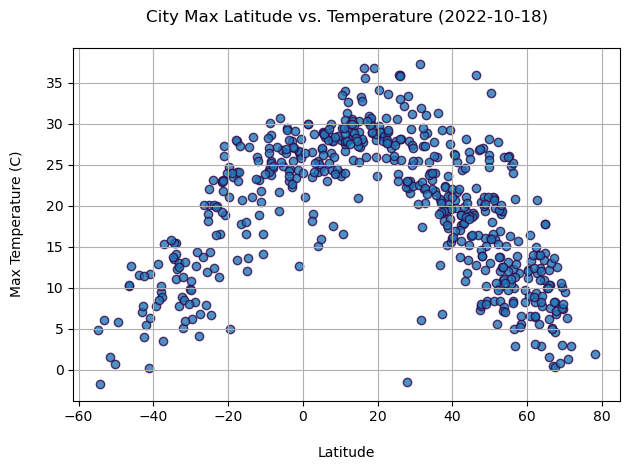

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="#31074a")

# Incorporate the other graph properties
plt.xlabel("\nLatitude")
plt.ylabel("Max Temperature (C)\n")
plt.title("City Max Latitude vs. Temperature (2022-10-18)\n")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

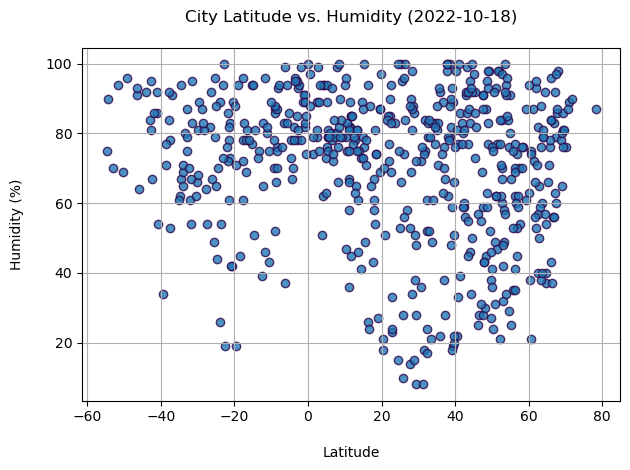

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="#31074a")

# Incorporate the other graph properties
plt.xlabel("\nLatitude")
plt.ylabel("Humidity (%)\n")
plt.title("City Latitude vs. Humidity (2022-10-18)\n")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

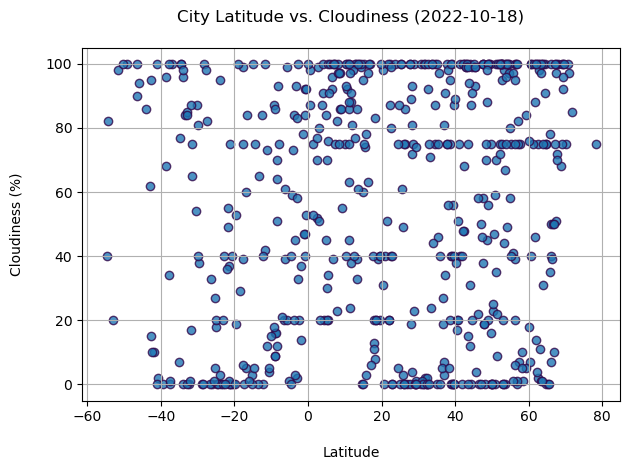

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="#31074a")

# Incorporate the other graph properties
plt.xlabel("\nLatitude")
plt.ylabel("Cloudiness (%)\n")
plt.title("City Latitude vs. Cloudiness (2022-10-18)\n")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

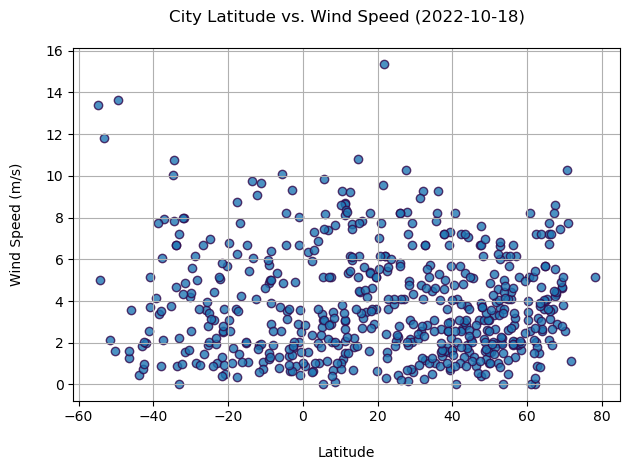

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="#31074a")

# Incorporate the other graph properties
plt.xlabel("\nLatitude")
plt.ylabel("Wind Speed (m/s)\n")
plt.title("City Latitude vs. Wind Speed (2022-10-18)\n")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
north_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,fort mcmurray,56.7268,-111.3810,20.77,45,0,2.06,CA,1686613108
4,georgetown,5.4112,100.3354,28.96,81,20,3.09,MY,1686612964
5,gardnerville ranchos,38.8882,-119.7413,19.55,82,40,1.54,US,1686613110
8,mandera,3.9366,41.8670,25.42,51,87,6.87,KE,1686613112
9,punta cana,18.5818,-68.4043,28.87,74,20,4.63,DO,1686613112


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
south_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.82,96,100,13.63,TF,1686613105
1,pimenta bueno,-11.6725,-61.1936,23.11,96,42,1.91,BR,1686613106
3,waitangi,-43.9535,-176.5597,11.57,92,86,0.45,NZ,1686613109
6,alice springs,-23.7000,133.8833,12.34,54,0,3.09,AU,1686613111
7,bairnsdale,-37.8333,147.6167,9.47,84,34,0.89,AU,1686612786


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.7570818542036372.


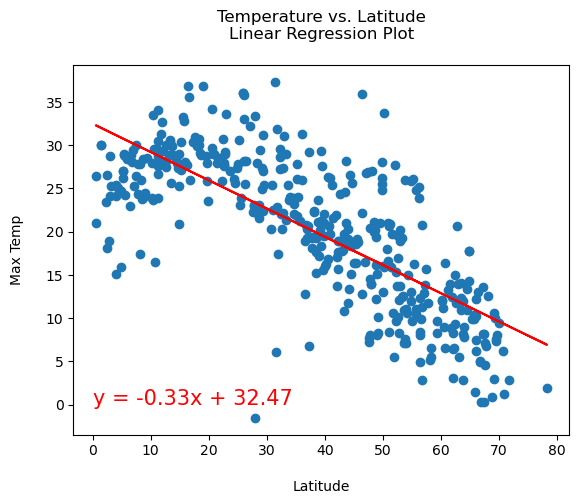

In [26]:
# Linear regression on Northern Hemisphere
x_values = north_hemi["Lat"]
y_values = north_hemi["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the graph
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title("Temperature vs. Latitude\n(Northern Hemisphere)\n")
plt.xlabel("\nLatitude")
plt.ylabel("Max Temp\n")
print(f"The r-value is {rvalue}.")

The r-value is 0.8291951280146025.


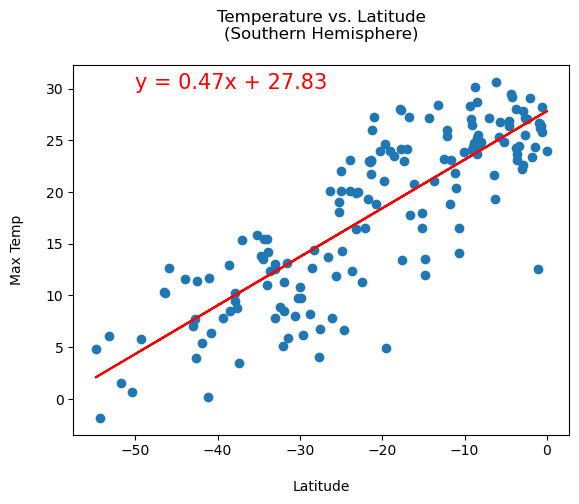

In [28]:
# Linear regression on Southern Hemisphere
x_values1 = south_hemi["Lat"]
y_values1 = south_hemi["Max Temp"]
slope = linregress(x_values1, y_values1)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)
regress_values = x_values1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the graph
plt.scatter(x_values1, y_values1)
plt.plot(x_values1, regress_values, "-r")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title("Temperature vs. Latitude\n(Southern Hemisphere)\n")
plt.xlabel("\nLatitude")
plt.ylabel("Max Temp\n")
print(f"The r-value is {rvalue}.")

**Discussion about the linear relationship:**<br><br>
From the above graphs, the following observations can be made:-
- In the graph for the Northern Hemisphere, the regression displays a negative relationship. This means that as the latitude moves away from the equator, the max temperature decreases.
- In the graph for the Southern Hemisphere, the regression displays a positive relationship. This means that as the latitude towards the equator, the max temperature inreases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.09109012174846887.


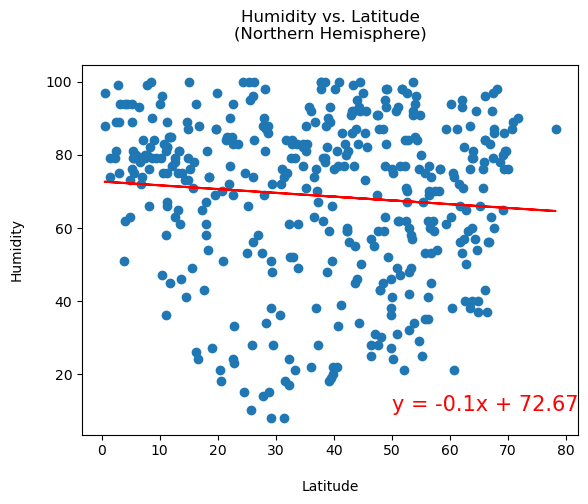

In [31]:
# Northern Hemisphere
x_values = north_hemi["Lat"]
y_values = north_hemi["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the graph
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.title("Humidity vs. Latitude\n(Northern Hemisphere)\n")
plt.xlabel("\nLatitude")
plt.ylabel("Humidity\n")
print(f"The r-value is {rvalue}.")

The r-value is 0.10361664196519683.


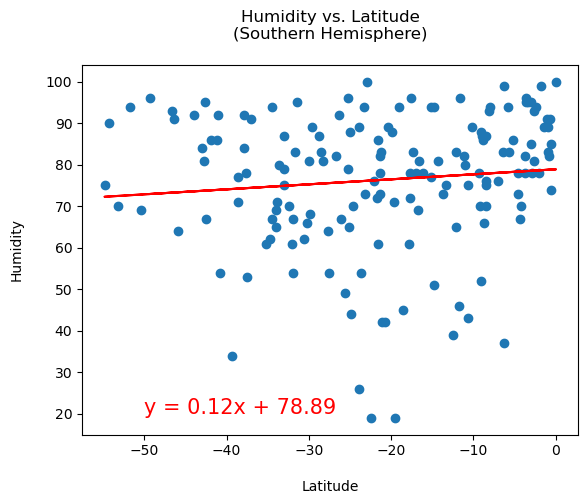

In [33]:
# Southern Hemisphere
x_values1 = south_hemi["Lat"]
y_values1 = south_hemi["Humidity"]
slope = linregress(x_values1, y_values1)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)
regress_values = x_values1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the graph
plt.scatter(x_values1, y_values1)
plt.plot(x_values1, regress_values, "-r")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Humidity vs. Latitude\n(Southern Hemisphere)\n")
plt.xlabel("\nLatitude")
plt.ylabel("Humidity\n")
print(f"The r-value is {rvalue}.")

**Discussion about the linear relationship:** <br><br>
From the above graphs, the following observations can be made:-
- In the graph for the Northern Hemisphere, the regression displays a negative relationship. This means that as the latitude moves away from the equator, the humidity decreases (only slightly).
- In the graph for the Southern Hemisphere, the regression displays a positive relationship. This means that as the latitude towards the equator, the humidty inrceases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.03160247455450178.


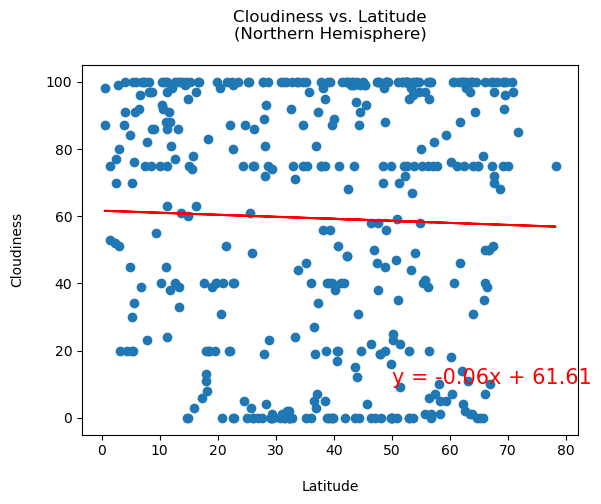

In [34]:
# Northern Hemisphere
x_values = north_hemi["Lat"]
y_values = north_hemi["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the graph
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.title("Cloudiness vs. Latitude\n(Northern Hemisphere)\n")
plt.xlabel("\nLatitude")
plt.ylabel("Cloudiness\n")
print(f"The r-value is {rvalue}.")

The r-value is -0.09870025917449107.


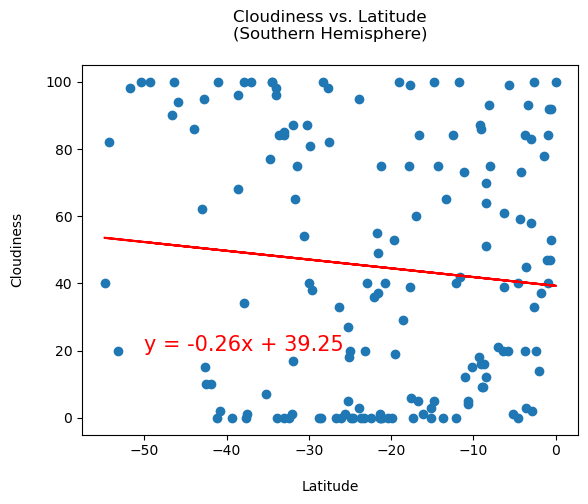

In [35]:
# Southern Hemisphere
x_values1 = south_hemi["Lat"]
y_values1 = south_hemi["Cloudiness"]
slope = linregress(x_values1, y_values1)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)
regress_values = x_values1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the graph
plt.scatter(x_values1, y_values1)
plt.plot(x_values1, regress_values, "-r")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Cloudiness vs. Latitude\n(Southern Hemisphere)\n")
plt.xlabel("\nLatitude")
plt.ylabel("Cloudiness\n")
print(f"The r-value is {rvalue}.")

**Discussion about the linear relationship:** <br><br>From both graphs, we can see that there is not much of a relationship between cloudiness and latitude distance from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.07188050155124058.


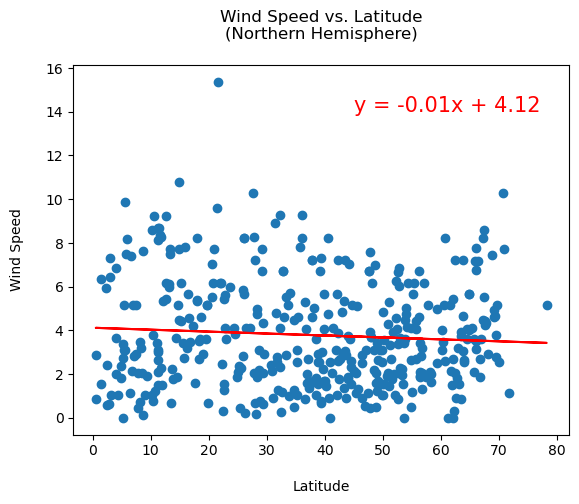

In [38]:
# Northern Hemisphere
x_values = north_hemi["Lat"]
y_values = north_hemi["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the graph
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(45,14),fontsize=15,color="red")
plt.title("Wind Speed vs. Latitude\n(Northern Hemisphere)\n")
plt.xlabel("\nLatitude")
plt.ylabel("Wind Speed\n")
print(f"The r-value is {rvalue}.")

The r-value is -0.1563895076171752.


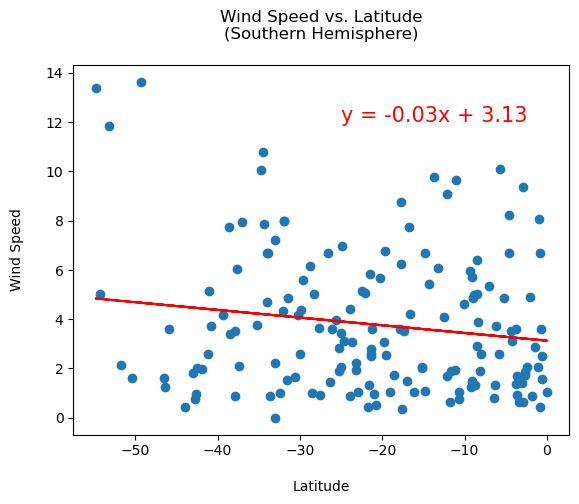

In [40]:
# Southern Hemisphere
x_values1 = south_hemi["Lat"]
y_values1 = south_hemi["Wind Speed"]
slope = linregress(x_values1, y_values1)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)
regress_values = x_values1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting the graph
plt.scatter(x_values1, y_values1)
plt.plot(x_values1, regress_values, "-r")
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
plt.title("Wind Speed vs. Latitude\n(Southern Hemisphere)\n")
plt.xlabel("\nLatitude")
plt.ylabel("Wind Speed\n")
print(f"The r-value is {rvalue}.")

**Discussion about the linear relationship:**  <br><br>From both graphs, we can see that there is not much of a relationship between wind speed and latitude distance from the equator.